<a href="https://colab.research.google.com/github/sachinkun21/IOT_Analytics/blob/master/IoT_analytics_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data acquisition:
### Let's get first set of IoT data using HTTP request.

WE will START by consuming an environmental API provided by a public community. The API consists of multiple endpoints, and we will start by consuming the temperature data. 

The data is in 10-minute intervals and limited historical data is available.

We will use requests to download the last 5 records. Since the endpoint provides json encoded data, you can use .json() on the response object to get a python object (in this case a list).

Then we will convert the list to a pandas DataFrame to be able to easily work with the data.

The constant URL to consume data from has been defined for you.

In [1]:
# Imports
import requests, pandas as pd

URL = 'https://assets.datacamp.com/production/repositories/4296/datasets/8f6b478697a8d05e10b7d535af67154549a4f38f/environ_MS83200MS_airtemp_600_30r.json'

# Download data from URL
res = requests.get(URL)

# Convert the result
data_temp = res.json()
print(data_temp)

# Convert json data to Dataframe
df_temp = pd.DataFrame(data_temp)

print(df_temp.head())

[{'timestamp': 1535764800000, 'value': 15.8}, {'timestamp': 1535765400000, 'value': 15.7}, {'timestamp': 1535766000000, 'value': 15.7}, {'timestamp': 1535766600000, 'value': 15.6}, {'timestamp': 1535767200000, 'value': 15.7}, {'timestamp': 1535767800000, 'value': 15.7}, {'timestamp': 1535768400000, 'value': 15.8}, {'timestamp': 1535769000000, 'value': 15.7}, {'timestamp': 1535769600000, 'value': 15.9}, {'timestamp': 1535770200000, 'value': 15.7}, {'timestamp': 1535770800000, 'value': 15.6}, {'timestamp': 1535771400000, 'value': 15.4}, {'timestamp': 1535772000000, 'value': 15.4}, {'timestamp': 1535772600000, 'value': 15.2}, {'timestamp': 1535773200000, 'value': 14.6}, {'timestamp': 1535773800000, 'value': 14.5}, {'timestamp': 1535774400000, 'value': 14.4}, {'timestamp': 1535775000000, 'value': 14.2}, {'timestamp': 1535775600000, 'value': 14.2}, {'timestamp': 1535776200000, 'value': 14.2}, {'timestamp': 1535776800000, 'value': 14.2}, {'timestamp': 1535777400000, 'value': 14.1}, {'timesta

### Another One: Acquire data with pandas
As we saw, consuming the public API, converting the data and transforming this into a DataFrame required multiple lines of code.

This can be simplified by using pandas: pd.read_json(), which handles the above steps for you.

You will consume the same API again. However this time, you'll be using pandas to consume the API and store the result to disk for further analysis. 

In [2]:
# Import pandas
import pandas as pd

# Load URL to Dataframe
df_temp = pd.read_json(URL)

# Print first 5 rows
print(df_temp.head())

# Print datatypes
print(df_temp.dtypes)

            timestamp  value
0 2018-09-01 01:20:00   15.8
1 2018-09-01 01:30:00   15.7
2 2018-09-01 01:40:00   15.7
3 2018-09-01 01:50:00   15.6
4 2018-09-01 02:00:00   15.7
timestamp    datetime64[ns]
value               float64
dtype: object


## Store data back into CSV and JSON
After consuming an API endpoint, it's often desirable to store the data to disk.

Some of the reasons we might want to store data are:

- archive reproducible results
- train ML Models

We will now consume the same api as you did in previous exercises, but this time we will store the data in both JSON and CSV format.

After running this code cell, we can also verify the data you saved using `!head filename.`


In [0]:
# Import pandas
import pandas as pd

# Load URL to Dataframe
df_temp = pd.read_json(URL)

# Save dataframe as json
df_temp.to_json('temperature.json', orient='records')

# Save dataframe as csv
df_temp.to_csv('temperature.csv' , index=False)

In [4]:
!head temperature.csv

timestamp,value
2018-09-01 01:20:00,15.8
2018-09-01 01:30:00,15.7
2018-09-01 01:40:00,15.7
2018-09-01 01:50:00,15.6
2018-09-01 02:00:00,15.7
2018-09-01 02:10:00,15.7
2018-09-01 02:20:00,15.8
2018-09-01 02:30:00,15.7
2018-09-01 02:40:00,15.9


### Reading data from file:
The data We will work with now includes additional columns about the environment like: humidity and air pressure. 
All data can be consumed seperately from the public API, and I've gathered, combined and stored 3 months in my drive

After having acquired and saved the data to disk, let's load it and explore.

We'll now load the data from CSV and JSON stored in my google drive, print the head and look at the DataFrame summary.

In [5]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [6]:
ls /gdrive/'My Drive'/DataScience/IoT

environment.json  traffic_heavy_vehicles.json  traffic_light_vehicles.json


In [7]:
import pandas as pd

json_file = '/gdrive/My Drive/DataScience/IoT/environment.json'

# Read file
df_env = pd.read_json(json_file)

# Print head
print(df_env.head())

# Print dataframe info
print(df_env.info())

            timestamp  precipitation  humidity  ...  sunshine  pressure  temperature
0 2018-09-01 00:00:00            0.0      95.6  ...     599.2    1016.3         16.1
1 2018-09-01 00:05:00            0.1       NaN  ...       NaN       NaN          NaN
2 2018-09-01 00:10:00            0.0      95.5  ...     600.0    1016.4         16.1
3 2018-09-01 00:15:00            0.0       NaN  ...       NaN       NaN          NaN
4 2018-09-01 00:20:00            0.0      95.2  ...     598.9    1016.5         16.1

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26175 entries, 0 to 26174
Data columns (total 7 columns):
timestamp        26175 non-null datetime64[ns]
precipitation    26162 non-null float64
humidity         13085 non-null float64
radiation        13085 non-null float64
sunshine         13083 non-null float64
pressure         13085 non-null float64
temperature      13059 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 MB
None


#### Understanding the data:
- printing the overview using info method
- Printing summary statistics usign describe method

In [8]:
# Print summary statistics
print(df_env.describe())

       precipitation      humidity  ...      pressure   temperature
count   26162.000000  13085.000000  ...  13085.000000  13059.000000
mean        0.008142     73.785059  ...   1019.190394     14.067670
std         0.057470     20.232647  ...      6.711385      6.612924
min         0.000000      8.900000  ...    989.500000     -1.800000
25%         0.000000     57.500000  ...   1016.000000      9.800000
50%         0.000000     78.900000  ...   1019.700000     13.400000
75%         0.000000     91.300000  ...   1023.300000     18.900000
max         2.700000    100.100000  ...   1039.800000     30.400000

[8 rows x 6 columns]


#### What is a Data Stream

Constant stream of Data

Examples:
- Twitter messages
- Online News Articles
- Video streams
- Sensor data (IoT)
- Market orders (nancial)

**MQTT: Message protocol(Message Queuing Telemetry Transport)**

MQTT is an efficient messaging protocol consisting of clients and brokers, which is often used in conjunction with IOT data streams.
- Publish / subscribe
- Small footprint

Server -> Acts as a message Broker

Client -> Connects to a Broker
- Publishes data
- Subscribes to topics

In [0]:
# import paho.mqtt.subscribe as subscribe
# def on_message(client, userdata, message):
#   print("{} : {}".format(message.topic, message.payload))

# subscribe.callback(on_message,
#                   topics="datacamp/roomtemp",
#                   hostname="test.mosquitto.org")

### Let's Perform some EDA:
#### Line plots
Plotting the series is an important step in the analysis process since it gives you an overview of how the data actually looks and allows us to identify trends and patterns easily.

We'll be plotting some line graphs using pandas .plot() method now.

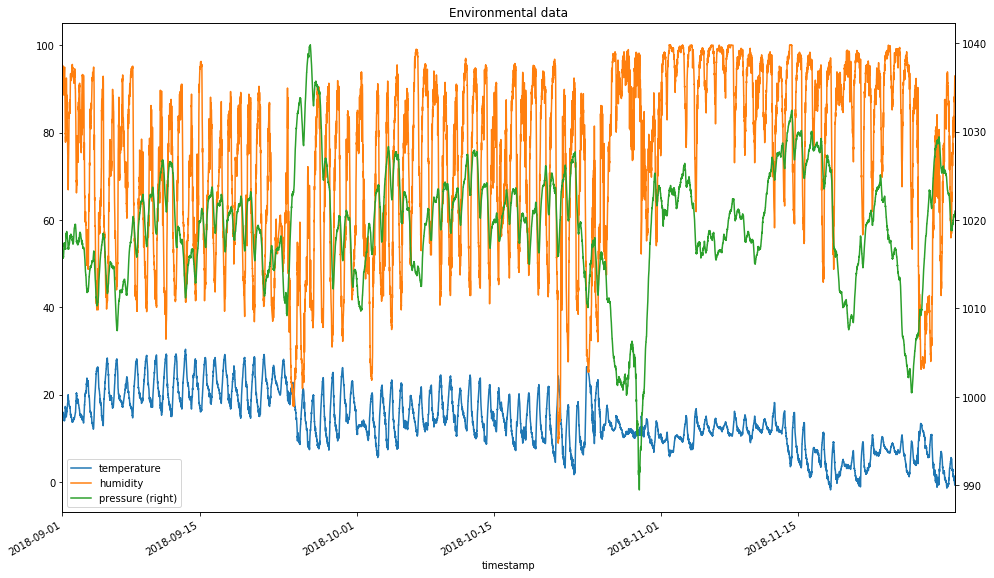

In [10]:
import matplotlib.pyplot as plt

df_env.index = df_env['timestamp']
df_clean = df_env.dropna()
#Cols to be plotted
cols = ["temperature", "humidity", "pressure"]

# Creating a line plot
df_clean[cols].plot(title = "Environmental data", secondary_y="pressure", figsize = (16,10))

# Label X-Axis
plt.xlabel("Time")

# Show plot
plt.show()

### Since we are going to create multiple line plots for testing, writing a function which takes dataframe and generates the LinePlot for the same

In [0]:
#Cols to be plotted
def plot_line(df):  
  cols = ["temperature", "humidity", "pressure"]

  # Creating a line plot
  df_nov[cols].plot(title = "Environmental data", secondary_y="pressure" , figsize = (18,8))

  # Label X-Axis
  plt.xlabel("Time")

  # Show plot
  plt.show()

In [12]:
df_env.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26175 entries, 2018-09-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 7 columns):
timestamp        26175 non-null datetime64[ns]
precipitation    26162 non-null float64
humidity         13085 non-null float64
radiation        13085 non-null float64
sunshine         13083 non-null float64
pressure         13085 non-null float64
temperature      13059 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.6 MB


**Let's plot only Novembers Data**

In [13]:
# Clean Data of November month
df_nov= df_clean['2018-11-01' :'2018-11-30']
df_nov.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4286 entries, 2018-11-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 7 columns):
timestamp        4286 non-null datetime64[ns]
precipitation    4286 non-null float64
humidity         4286 non-null float64
radiation        4286 non-null float64
sunshine         4286 non-null float64
pressure         4286 non-null float64
temperature      4286 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 267.9 KB


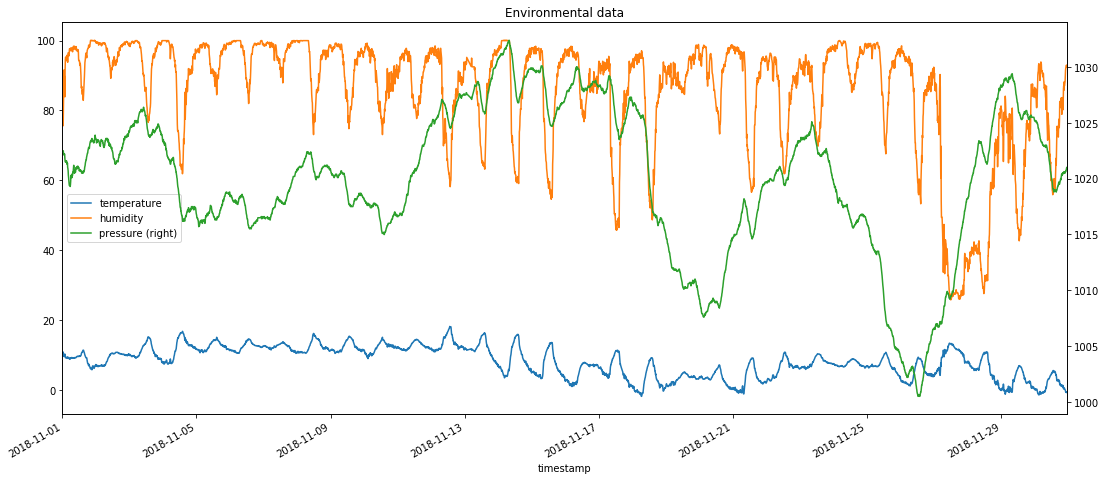

In [14]:
# Calling the method to plot line
plot_line(df_nov)

- After the first plot, not much detail was visible for either temperature or humidity.

- Segregating One Month data and Moving the pressure-column to the 2nd Y-Axis allowed us to compare the series without loosing too much detail, even though they have completely different scalings.

**Histogram Plot**

While it's important to know how the data looks, data distribution is equally important.

We can do this for the environmental dataset by plotting histograms.

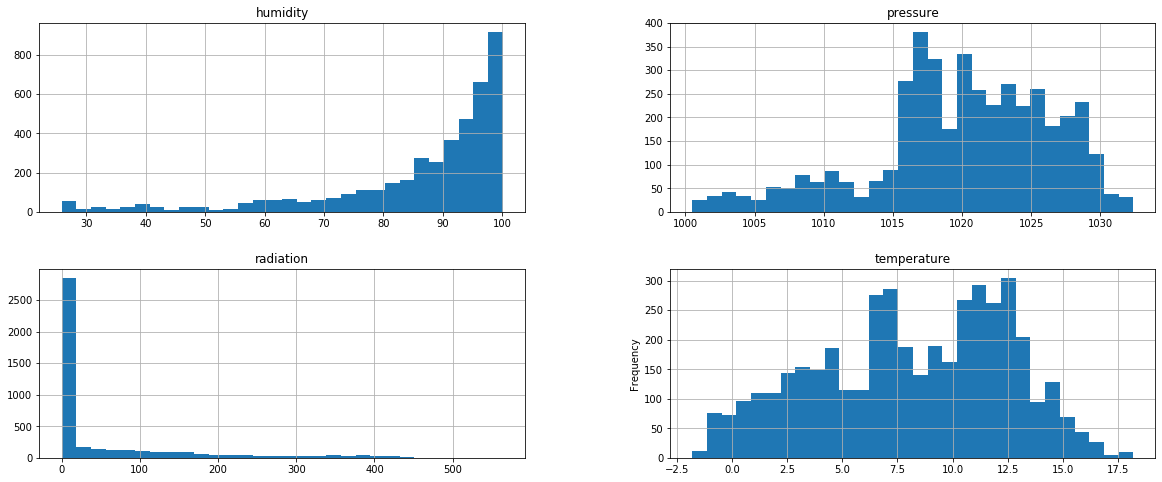

In [15]:
# cols to be plotted in histogram
cols = ["temperature", "humidity", "pressure", "radiation"]

# Create a histogram
df_nov[cols].hist(bins = 30, figsize = (20,8))

# Label Y-Axis
plt.ylabel("Frequency")

# Show plot
plt.show()

From histogram, we can see that Temperature and pressure show a bell-curve, which is an indication of a normally distributed dataset.

## **Cleaning Data:**
### **1. Missing data**
#### Possible reasons for missing data from IoT devices
- Unstable network connection
- No power
- Other External factors

#### Times to deal with data quality
- During data collection: used in RealTime analytic application
- During analysis: For later Analytics



#### Methods to deal with missing data:
Depending on the amount of missing data and column in which it appears, we have different methods at our disposal.

If only a few measurements are missing, we can fill them using:
- mean
- median
- forward
- backward

If huge amount of data is missing we can drop the feature as well.
- Alternatively we can stop analysis if a huge amount of data has been dropped as it might reduce the chances of getting any valuable insight or Pattern as, with too many missing values, analysis may not make sense

In [16]:

# Clean Data of November month
df_nov= df_env['2018-11-01' :'2018-11-30']
print(df_nov.info())

# Forward-fill missing values
data_clean = df_nov.fillna(method = 'ffill')
print(data_clean.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8629 entries, 2018-11-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 7 columns):
timestamp        8629 non-null datetime64[ns]
precipitation    8626 non-null float64
humidity         4315 non-null float64
radiation        4315 non-null float64
sunshine         4315 non-null float64
pressure         4315 non-null float64
temperature      4289 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 539.3 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8629 entries, 2018-11-01 00:00:00 to 2018-11-30 23:00:00
Data columns (total 7 columns):
timestamp        8629 non-null datetime64[ns]
precipitation    8629 non-null float64
humidity         8629 non-null float64
radiation        8629 non-null float64
sunshine         8629 non-null float64
pressure         8629 non-null float64
temperature      8629 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 539.3 KB
None


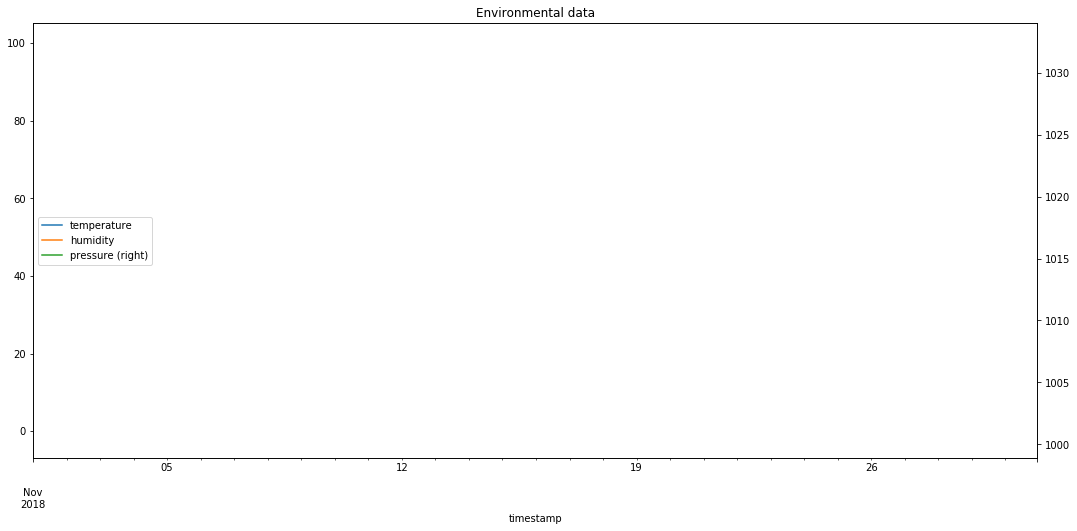

In [22]:
plot_line(data_clean)

**Note: We can observe that both methods have a different outcome**

Both methods have their advantages and disadvantages, and depending on the type of analysis it's not always allowed to drop observations.

### Also Check if distribution of data has changed after ForwardFill?

### **Missing data: Part II**
While analyzing data, you should be aware of any longer, connected periods without data, as this can influence your results.

While you can fill columns with missing data, the previous methods did not reveal if no data is present for a period of time.

In this exercise, you'll search for periods of time without data, and you'll try to detect them visually in a line graph.

In [18]:
five_days_of_data = df_env['2018-11-05' :'2018-11-10'][['temperature', 'humidity']]
data = five_days_of_data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 864 entries, 2018-11-05 00:00:00 to 2018-11-10 23:50:00
Data columns (total 2 columns):
temperature    864 non-null float64
humidity       864 non-null float64
dtypes: float64(2)
memory usage: 20.2 KB


In [19]:
# Calculate and print NA count
print(data.isna().sum())

# Resample data
data_res = data.resample("10min").last()

# Calculate and print NA count
print(data_res.isna().sum())

temperature    0
humidity       0
dtype: int64
temperature    0
humidity       0
dtype: int64


In [28]:
data_res['2018-11-08 04:50:00' :'2018-11-08'].head()

,temperature,humidity
timestamp,,
2018-11-08 04:50:00,10.7,100.0
2018-11-08 05:00:00,10.7,100.0
2018-11-08 05:10:00,10.8,100.0
2018-11-08 05:20:00,10.8,100.0
2018-11-08 05:30:00,10.7,100.0


In [29]:
df_env['2018-11-08' :'2018-11-08'][['temperature', 'humidity']].head()

,temperature,humidity
timestamp,,
2018-11-08 00:00:00,10.9,100.0
2018-11-08 00:05:00,NaN,NaN
2018-11-08 00:10:00,10.9,100.0
2018-11-08 00:15:00,NaN,NaN
2018-11-08 00:20:00,10.8,100.0


### **Analyzing Energy counter data**
Simply plotting energy counter data will not show anything other than 2 straight lines.

The energy counter gives you a running total, but what you really care about his how much energy was consumed between each measurement.

You need to calculate the difference between 2 consecutive values to see how much energy has been consumed in each interval. Creating the percentage-change from the difference allows for easier comparison and allows new insights.

pandas has already been imported as pd, and matplotlib.pyplot as plt. The DataFrame is available as df.

In [0]:
# # Get difference between values
# df_diff = df.diff(1)

# # Plot the DataFrame
# df_diff.plot()
# plt.show()

In [0]:
# # Resample df to 30 minutes
# df_res = df.resample('30min').max()

# # Get difference between values
# df_diff = df_res.diff()

# # Get the percent changed
# df_pct = df_diff.pct_change()

# # Plot the DataFrame
# df_pct.plot()
# plt.show()

Notice that after the first Section we saw a huge spike. This is because there is some data missing. By resampling the data to 30 minute intervals, we can clearly see that area2 has a much higher energy consumption than area. After visualizing the percentage change, the differences become clearer and we can see that area1 has higher fluctuations, however we cannot see which one has a higher overall consumption.